In [1]:
# Start loading libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Read oil price and transform data

xls_file=pd.ExcelFile("RBRTEd.xls") # Read Excel
brent=xls_file.parse("Data 1") # Read sheet Data 1
brent.columns=brent.iloc[1] # set row 1 as column name
brent=brent[2:] # remove first 2 rows
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()

,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


In [3]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8542 entries, 2 to 8543
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       8542 non-null   datetime64[ns]
 1   oil_price  8542 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 133.6+ KB


<AxesSubplot:xlabel='date'>

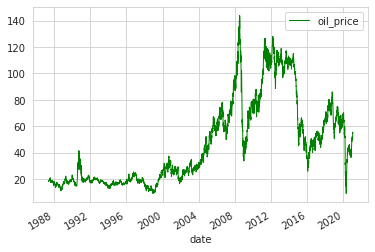

In [17]:
brent[['date','oil_price']].set_index('date').plot(color="green", linewidth=1.0)  

In [4]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv(shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-16,1976.500000,28.78,2000,RDSB.L,0.562190
1,2000-05-17,1932.540039,28.40,2000,RDSB.L,0.539927
2,2000-05-18,1997.910034,28.90,2000,RDSB.L,0.573033
3,2000-05-19,2016.189941,29.01,2000,RDSB.L,0.582290
4,2000-05-22,2017.930054,28.45,2000,RDSB.L,0.583171


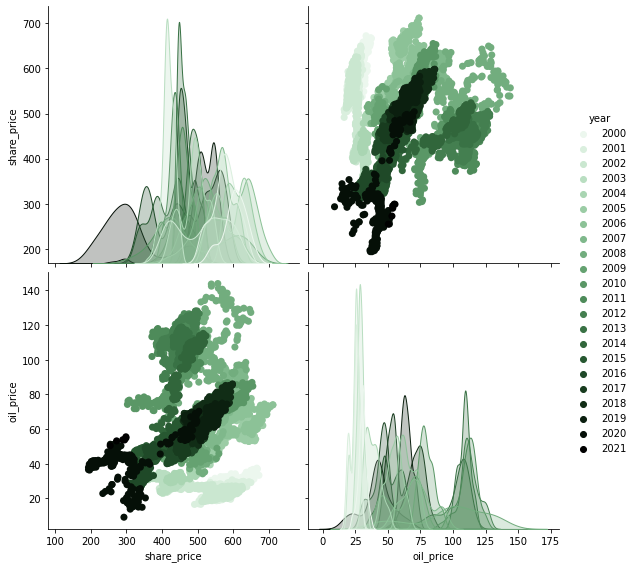

In [6]:
#==============================================================================
# Pairplot using master data table (all_data) with a filter on BP share price
#==============================================================================
palette=sns.cubehelix_palette(22, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50,edgecolor="b",  linewidth=0))

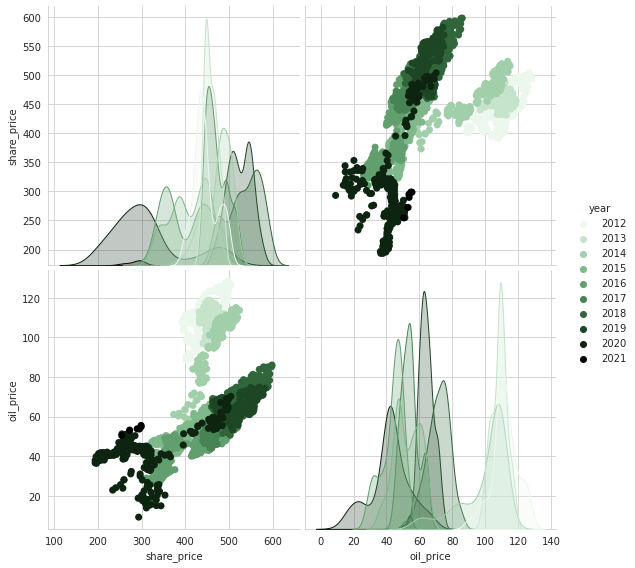

In [10]:
#=========================================================================================
# Pairplot on less data 2012 to 2021 using British Petroleum Company Limited stock price
#=========================================================================================

# Just for the last 5 years
all_data13=all_data[all_data["year"]>2011]
palette=sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))


<AxesSubplot:xlabel='year', ylabel='oil_price'>

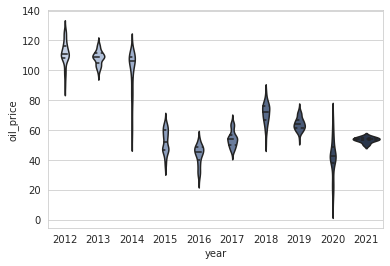

In [16]:
#==============================================================================
# Violin Plot Oil price on last 10 years for British Petroleum Company Limited
#==============================================================================

sns.set_style("whitegrid")
palette=sns.cubehelix_palette(10, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)

sns.violinplot(x="year", y="oil_price", data=all_data13[all_data13['name']=="BP.L"],
               inner="quart", palette=palette, trim=True)


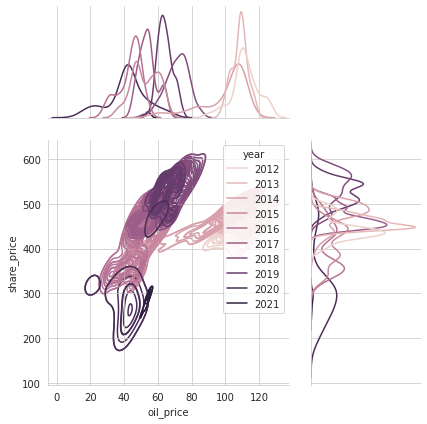

In [12]:
#==============================================================================
# joint plot using 10 years for British Petroleum Company Limited
#==============================================================================

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="BP.L"],kind="kde",
              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

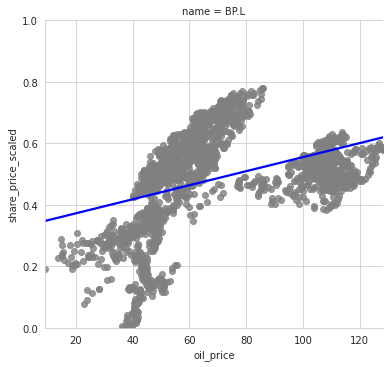

In [13]:
#==============================================================================
# lmplot using using 10 years for British Petroleum Company Limited
#==============================================================================

sns.lmplot(x="oil_price", y="share_price_scaled", col="name",ci=None, col_wrap=3, 
           data=all_data13[all_data13['name']=="BP.L"], order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))


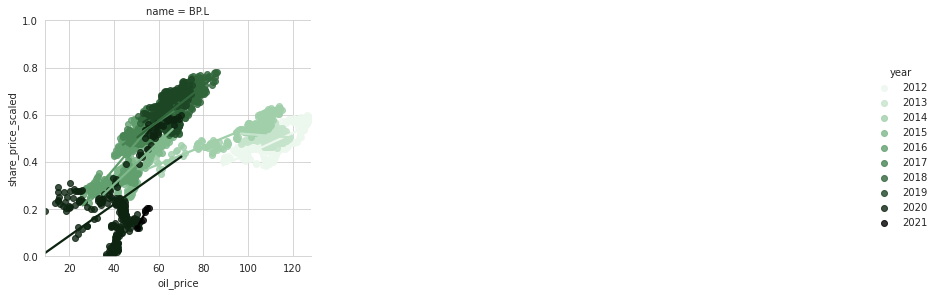

In [15]:
palette=sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13[all_data13['name']=="BP.L"], order=1,palette=palette,size=4).set(ylim=(0, 1))